In [1]:
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Pytorch/House_Price_Prediction.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"])

In [3]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,1999,953,694,175000
1456,20,RL,85.0,13175,Pave,Reg,1978,2073,0,210000
1457,70,RL,66.0,9042,Pave,Reg,1941,1188,1152,266500
1458,20,RL,68.0,9717,Pave,Reg,1950,1078,0,142125


In [4]:
# Checking sum of Null Values
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
LotShape         0
YearBuilt        0
1stFlrSF         0
2ndFlrSF         0
SalePrice        0
dtype: int64

In [5]:
# Removing the null values
df = df.dropna()

In [6]:
# Viewing the shape of the datset
df.shape

(1201, 10)

In [7]:
# Info of the datsets
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [8]:
# Checking the unique values
for i in df.columns:
  print("{} has {} unique values".format(i, len(df[i].unique())))

MSSubClass has 15 unique values
MSZoning has 5 unique values
LotFrontage has 110 unique values
LotArea has 869 unique values
Street has 2 unique values
LotShape has 4 unique values
YearBuilt has 112 unique values
1stFlrSF has 678 unique values
2ndFlrSF has 368 unique values
SalePrice has 597 unique values


In [9]:
# Based on the year built we can calculate the no of years used

import datetime
yr = datetime.datetime.now().year
yr

2021

In [10]:
df['Total_Year']= yr - df['YearBuilt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.drop('YearBuilt', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total_Year'],
      dtype='object')

In [13]:
categorical_features = ["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature = "SalePrice"

In [14]:
from sklearn.preprocessing import LabelEncoder

for cat_feature in categorical_features:
  label_encoder = LabelEncoder()
  df[cat_feature] = label_encoder.fit_transform(df[cat_feature])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_Year
0,5,3,65.0,8450,1,3,856,854,208500,18
1,0,3,80.0,9600,1,3,1262,0,181500,45
2,5,3,68.0,11250,1,0,920,866,223500,20
3,6,3,60.0,9550,1,0,961,756,140000,106
4,5,3,84.0,14260,1,0,1145,1053,250000,21
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,22
1456,0,3,85.0,13175,1,3,2073,0,210000,43
1457,6,3,66.0,9042,1,3,1188,1152,266500,80
1458,0,3,68.0,9717,1,3,1078,0,142125,71


In [16]:
# Stacking the data to convert into tensors
import numpy as np
cat_feat = np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_feat

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [17]:
#Converting Numpy to Tensors

import torch
cat_feat = torch.tensor(cat_feat, dtype = torch.int64)# Categorical feature should be int
cat_feat

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [18]:
# Create continuous variable
continuous_feature = []
for i in df.columns:
  if  i in categorical_features:
    pass
  else:
    continuous_feature.append(i)

In [19]:
continuous_feature

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total_Year']

In [20]:
continuous_feature.remove('SalePrice')
continuous_feature

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_Year']

In [21]:
# Stacking continuous variable
cont_feat = np.stack([df[i].values for i in continuous_feature], axis = 1)

In [22]:
cont_feat

array([[   65.,  8450.,   856.,   854.,    18.],
       [   80.,  9600.,  1262.,     0.,    45.],
       [   68., 11250.,   920.,   866.,    20.],
       ...,
       [   66.,  9042.,  1188.,  1152.,    80.],
       [   68.,  9717.,  1078.,     0.,    71.],
       [   75.,  9937.,  1256.,     0.,    56.]])

In [23]:
cont_feat.dtype

dtype('float64')

In [24]:
cont_feat = torch.tensor(cont_feat, dtype=torch.float)

In [25]:
cont_feat# Continuous feature should be float
cont_feat.dtype

torch.float32

In [26]:
# Dependent feature

dep_feature = torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)# To get 2 Dim data
dep_feature

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total_Year   1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [28]:
df.shape

(1201, 10)

In [29]:
cat_feat.shape

torch.Size([1201, 4])

In [30]:
cont_feat.shape

torch.Size([1201, 5])

In [31]:
dep_feature.shape

torch.Size([1201, 1])

In [32]:
# we need to set the dimension to perform the embedding

cat_dim = [len(df[col].unique()) for col in categorical_features]
cat_dim

[15, 5, 2, 4]

In [33]:
# Embedding Dimension
# for the inputs we use the length of the columns and for the output we use the formula - Thumb rule

embed_dim = [(x, min(50, (x+1)//2)) for x in cat_dim]
embed_dim #It helps to create the features during the column

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as fun

In [35]:
class ANN_Model(nn.Module):
  def __init__(self, embed_dim, n_cond, out_sz, layers, p = 0.5):
    super().__init__() # calling the  nn.Module parameters
    self.embedd = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embed_dim])
    self.drop_out = nn.Dropout(p) # Regularization
    self.bn_cont = nn.BatchNorm1d(n_cond)# helps us for the less computation
    layerlist = []
    n_emb = sum((out for inp,out in embed_dim))
    n_in = n_emb + n_cond
    print('n_in:', n_in)

    for i in layers:
      layerlist.append(nn.Linear(n_in,i)) 
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in = i
    layerlist.append(nn.Linear(layers[-1],out_sz))
    print('layerlist:', layerlist)

    self.layers = nn.Sequential(*layerlist)
    
  def forward(self, x_cat, x_cont):
    embeddings = []
    for i,e in enumerate(self.embedd):
      embeddings.append(e(x_cat[:,i]))
    x = torch.cat(embeddings, 1)
    x = self.drop_out(x)
    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x, x_cont], 1)
    x = self.layers(x)
    return x

In [36]:
len(continuous_feature)

5

In [37]:
torch.manual_seed(100)
model=ANN_Model(embed_dim,len(continuous_feature),1,[100,50],p=0.5)

n_in: 19
layerlist: [Linear(in_features=19, out_features=100, bias=True), ReLU(inplace=True), BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.5, inplace=False), Linear(in_features=100, out_features=50, bias=True), ReLU(inplace=True), BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.5, inplace=False), Linear(in_features=50, out_features=1, bias=True)]


In [38]:
model

ANN_Model(
  (embedd): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [39]:
cont_feat.shape

torch.Size([1201, 5])

In [40]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [41]:

batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_feat[:batch_size-test_size]
test_categorical=cat_feat[batch_size-test_size:batch_size]

In [42]:
train_cont=cont_feat[:batch_size-test_size]
test_cont=cont_feat[batch_size-test_size:batch_size]

In [43]:
y_train=dep_feature[:batch_size-test_size]
y_test=dep_feature[batch_size-test_size:batch_size]

In [44]:
epochs=10000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.78125
Epoch number: 11 and the loss : 200493.65625
Epoch number: 21 and the loss : 200489.265625
Epoch number: 31 and the loss : 200482.890625
Epoch number: 41 and the loss : 200473.875
Epoch number: 51 and the loss : 200461.75
Epoch number: 61 and the loss : 200446.984375
Epoch number: 71 and the loss : 200430.078125
Epoch number: 81 and the loss : 200409.265625
Epoch number: 91 and the loss : 200384.9375
Epoch number: 101 and the loss : 200356.484375
Epoch number: 111 and the loss : 200324.3125
Epoch number: 121 and the loss : 200293.015625
Epoch number: 131 and the loss : 200253.578125
Epoch number: 141 and the loss : 200208.8125
Epoch number: 151 and the loss : 200162.734375
Epoch number: 161 and the loss : 200117.671875
Epoch number: 171 and the loss : 200063.03125
Epoch number: 181 and the loss : 200009.890625
Epoch number: 191 and the loss : 199950.15625
Epoch number: 201 and the loss : 199880.890625
Epoch number: 211 and the loss : 199822.0

Text(0.5, 0, 'epoch')

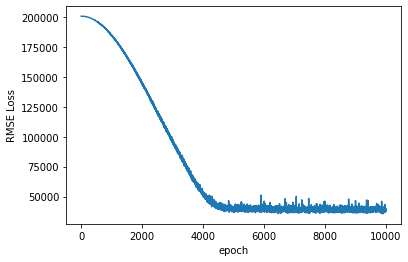

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [46]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))


RMSE: 52093.7109375


In [47]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [48]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])


In [49]:
data_predicted

,Prediction
0,117721.156250
1,159971.984375
2,180509.093750
3,276208.531250
4,154784.093750
...,...
175,141687.421875
176,255841.359375
177,197658.250000
178,253755.296875


In [50]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output

,Test,Prediction,Difference
0,130000.0,117721.156250,12278.843750
1,138887.0,159971.984375,-21084.984375
2,175500.0,180509.093750,-5009.093750
3,195000.0,276208.531250,-81208.531250
4,142500.0,154784.093750,-12284.093750
...,...,...,...
175,185000.0,141687.421875,43312.578125
176,175000.0,255841.359375,-80841.359375
177,210000.0,197658.250000,12341.750000
178,266500.0,253755.296875,12744.703125


In [51]:
torch.save(model,'HousePrice.pt')

In [52]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [53]:
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=ANN_Model(embs_size,5,1,[100,50],p=0.5)

n_in: 19
layerlist: [Linear(in_features=19, out_features=100, bias=True), ReLU(inplace=True), BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.5, inplace=False), Linear(in_features=100, out_features=50, bias=True), ReLU(inplace=True), BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.5, inplace=False), Linear(in_features=50, out_features=1, bias=True)]


In [54]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [55]:
model1.eval()

ANN_Model(
  (embedd): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)